In [1]:
import numpy as np
import matplotlib.pyplot as plt

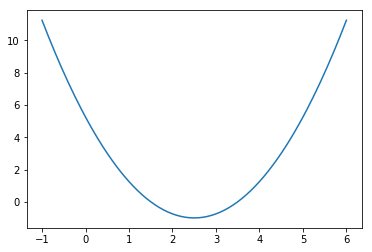

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5) ** 2 - 1

plt.plot(plot_x, plot_y)
plt.show()

## 实现梯度下降法

In [3]:
# 函数的导数
def dJ(theta):
    return 2 * (theta - 2.5)

# 损失函数
def J(theta):
    return (theta - 2.5) ** 2 - 1

In [4]:
theta = 0.0
eta =  0.1
epsilon = 1e-8
while True:
    
    gradient =  dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if abs(J(last_theta) - J(theta)) < epsilon:
        break

print(theta)
print(J(theta))    

2.499891109642585
-0.99999998814289


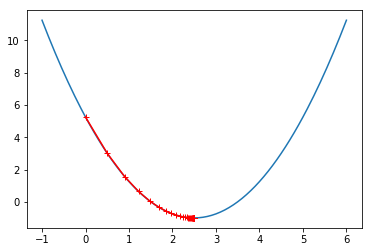

In [5]:
# eta 的影响

theta = 0.0
eta =  0.1
epsilon = 1e-8
theta_history = [theta]
while True:
    
    gradient =  dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if abs(J(last_theta) - J(theta)) < epsilon:
        break

plt.plot(plot_x, plot_y)
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
plt.show()

In [6]:
# 封装函数
def grident_descent(initial_theta, eta, n_iters=10, epsilon=1e-8):
    theta = initial_theta
    theta_history = [theta]
    i_iters = 0
    
    while i_iters < n_iters:
        gradient =  dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if abs(J(last_theta) - J(theta)) < epsilon:
            break
        i_iters += 1
    return theta_history
    
def plot_theta_history(theta_history):
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
    plt.show()
    

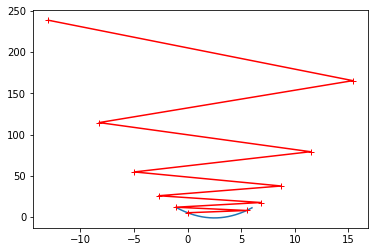

In [7]:
eta = 1.1
theta_history = grident_descent(0.0, eta)
plot_theta_history(theta_history)

### 在线性回归模型中使用梯度下降法

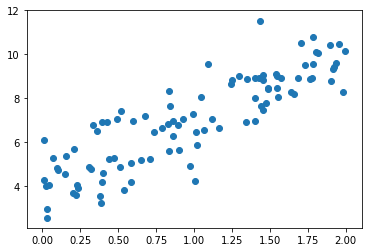

In [8]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

X = x.reshape(-1, 1)
plt.scatter(x, y)
plt.show()

### 使用梯度下降法

In [9]:
# 获取损失函数的值
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')
    

# 对theta求导
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] =(X_b.dot(theta) - y).dot(X_b[:, i])
    
    return res * 2 / len(X_b)


# 梯度下降
def grident_descent1(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iters = 0
    
    while i_iters < n_iters:
        gradient =  dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if abs(J(last_theta, X_b, y) - J(theta, X_b, y)) < epsilon:
            break
        i_iters += 1
    return theta

In [10]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = grident_descent1(X_b, y, initial_theta, eta)
theta

array([4.02145786, 3.00706277])

### 封装到线性回归模型中

In [11]:
from playML.LinearRgression import LinearRgression

lin_reg = LinearRgression()
lin_reg.fit_gd(x.reshape(-1, 1), y)

LinearRegression()

In [12]:
lin_reg.coef_

array([3.00706277])

In [13]:
lin_reg.interception_

4.021457858204859

# 随机梯度下降法

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)

In [16]:
# 某个样本的theta求导
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.


# 随机梯度下降
def sgd(X_b, y, initial_theta, n_iters):
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        
        gradient =  dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [17]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b) // 3)

Wall time: 1.05 s


In [18]:
theta

array([2.93989714, 3.99770056])

In [19]:
from playML.LinearRgression import LinearRgression

lin_reg =  LinearRgression()
lin_reg.fit_sgd(X, y)

LinearRegression()

In [20]:
lin_reg.coef_

array([4.01144388])

In [21]:
lin_reg.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [22]:
lin_reg.coef_

array([4.01693565])

# 如何调试梯度

In [33]:
# 获取损失函数的值
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

# 数学公式求导
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(X_b)

# 求导推导公式 求导
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
#         theta_1 = theta.copy()
#         theta_1[i] += epsilon
#         theta_2 = theta.copy()
#         theta_2[i] -= epsilon
#         res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
        res[i] = (J(theta[i] + epsilon, X_b, y) - J(theta[i] - epsilon, X_b, y)) / (2 * epsilon)
    return res

In [24]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))
true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [25]:
X.shape

(1000, 10)

In [26]:
y.shape

(1000,)

In [28]:
# 梯度下降调试
def grident_descent(dJ, X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iters = 0
    
    while i_iters < n_iters:
        gradient =  dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if abs(J(last_theta, X_b, y) - J(theta, X_b, y)) < epsilon:
            break
        i_iters += 1
    return theta

In [32]:
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = grident_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

Wall time: 1min 12s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [34]:
%time theta = grident_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

Wall time: 29.8 s


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [30]:
%time theta = grident_descent(dJ_math, X_b, y, initial_theta, eta)
theta

Wall time: 8.4 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])